In [1]:
import nn_tools
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
df = pd.read_csv("data/slice0.csv", index_col = 0)
D = []
for k in range(5):
    if k==0:
        D.append([np.array(df.iloc[:,:52]), np.array(df.iloc[:,-36:])])
    else:
        if k%2 == 0:
            D.append([np.concatenate([np.array(df.iloc[:,:52]).astype(float),
                                        np.ones((df.shape[0], 36))],
                                        axis = 1),
                       np.array(df.iloc[:,-36:]).astype(float)])
        if k%2 == 1:
            D.append([np.concatenate([np.array(df.iloc[:,52:104]).astype(float),
                                        np.ones((df.shape[0], 36))],
                                        axis = 1),
                       np.array(df.iloc[:,-36:]).astype(float)])

In [3]:
Q_list = nn_tools.define_Q(5)

In [6]:
losses = []
for _ in tqdm(range(50)):
    losses.append(nn_tools.one_epoch_layers(Q_list, D, nn_tools.optimiers_list(Q_list)))

100%|██████████| 50/50 [02:57<00:00,  3.54s/it]


<Axes: >

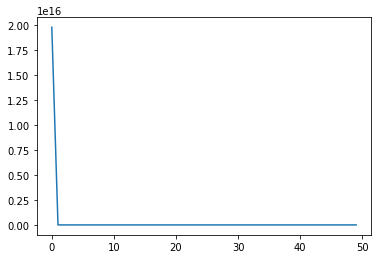

In [10]:
sns.lineplot(np.array(losses)[:,0])